# Custom indicator example

In [9]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass


In [10]:
ticker = 'AAPL'
prices = yf.Ticker(ticker).history('5y')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-25 00:00:00-04:00,52.127053,53.005773,51.897195,52.627468,119423200,0.0,0.0
2018-10-26 00:00:00-04:00,51.693665,52.720836,50.920296,51.789440,189033600,0.0,0.0
2018-10-29 00:00:00-04:00,52.481406,52.601123,49.344827,50.817345,183742000,0.0,0.0
2018-10-30 00:00:00-04:00,50.556364,51.521280,50.106232,51.071148,146640000,0.0,0.0
2018-10-31 00:00:00-04:00,51.928324,52.783099,51.866069,52.402401,153435600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-19 00:00:00-04:00,176.039993,177.839996,175.190002,175.460007,59302900,0.0,0.0
2023-10-20 00:00:00-04:00,175.309998,175.419998,172.639999,172.880005,64189300,0.0,0.0
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.0,0.0


In [11]:

@dataclass
class DEMA:
    """ Double Exponential Moving Average """
    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [12]:
res = DEMA(20)(prices)
res.tail()


Date
2023-10-19 00:00:00-04:00    176.541387
2023-10-20 00:00:00-04:00    175.851252
2023-10-23 00:00:00-04:00    175.281129
2023-10-24 00:00:00-04:00    174.873558
2023-10-25 00:00:00-04:00    174.057079
Name: close, dtype: float64

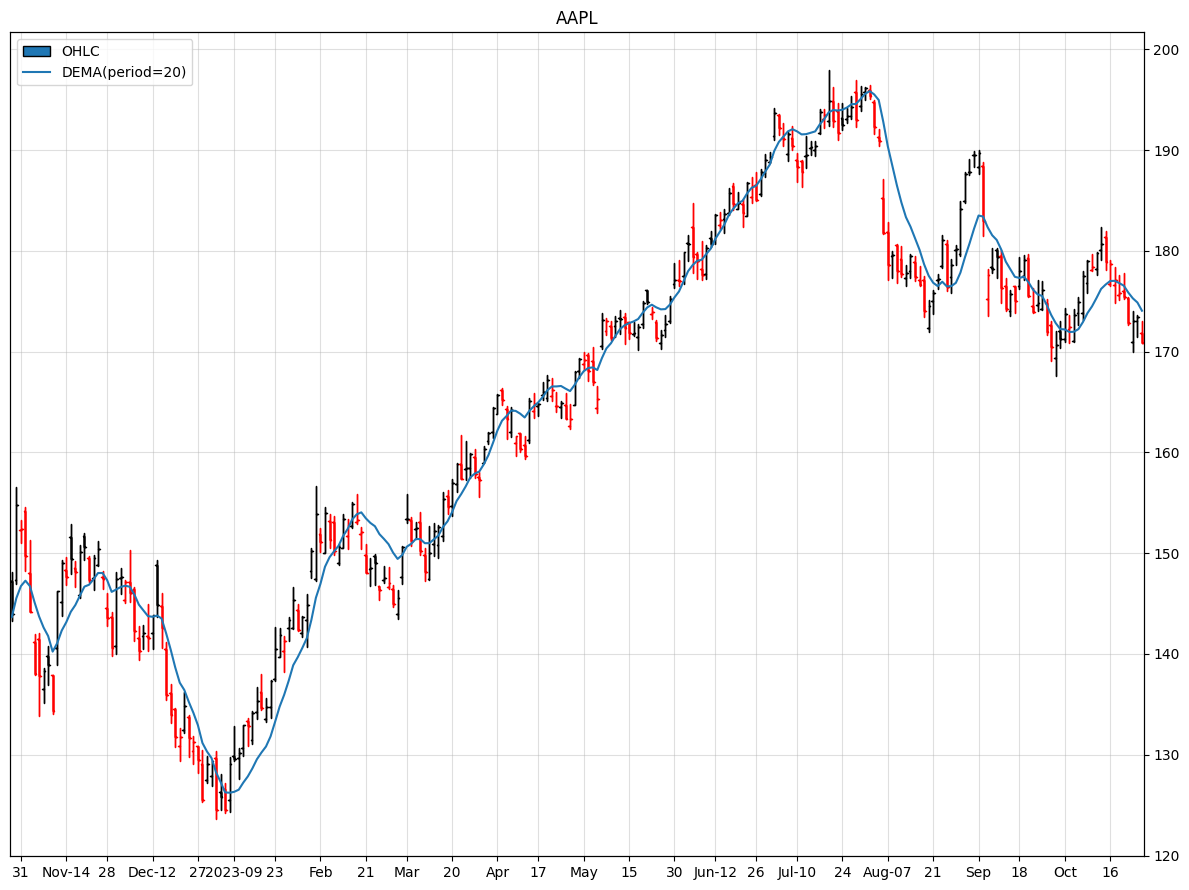

In [13]:
max_bars = 250

indicators = [
    OHLC(), DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
